# IV - dIdV Sweep Analysis Demo for Single Channel

(see <b>ivsweep_analysis_adv.ipynb</b> for multiple channels)

The analysis of IV/dIdV sweep data is done in 2 steps:
1. <font color="blue"><b>Processing of the data</b> </font> which includes cutting pile-ups using "autocut", calculating offset, noise PSD (if IV/noise data available). 
  * Users can choose to process specific channels and to enable processing of IV/noise and/or dIdV data. 
  * By default, all available data for all channels are processed. 
  * Best is to process using <b>detprocess/scripts/process.py </b> rather than processing in a Jupyter notebook (see processing section). <br><br>
  
2. <font color="blue"><b>IV and/or dIdV analysis</b></font>: Analyze IV data to calculate TES resistance and bias power, fit dIdV if dIdV data available. This is done in a Jupyter notebook.  Multiple channels can be analyzed in the same time. 



We use data taken at UC Berkeley  using Spice/Herald <b>Melange 1% </b> devices. Data are only stored locally. Change path to run notebook

In [2]:
import qetpy as qp
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import pickle

# detprocess
from detprocess import DIDVAnalysis, IVSweepAnalysis, IVSweepProcessing

## 1. IV Sweep processing


This step can be either done in a Jupyter Notebook or command line:

 * <font color="blue"><b>Jupyter Notebook:</b></font>
   * Instantiate IVSweepProcessing with data path
   * Call process" function. Default: all channels available processed, both IV and dIdV if available. Use arguments to disable either IV or dIdV or select specific channels. 
   
 * <font color="blue"><b>Command line </b></font> using <i><b>scripts/process.py</b></i> (<font color="red"><b>preferred</b></font>)
   * example: <i> python3 scripts/process.py --enable-ivsweep --raw_path /sdata1/runs/run28/raw/iv_didv_I2_D20230615_T231959 --ncores 16</i>

#### Processing using Jupyter Notebook directly

Let's save data in default location (same base directory as raw data + /processed/[group_name]/sweep_analysis_DYYYYMMDD_HHMMSS.hdf5). <br>
A different base path can be provided using "save_path" argument

In [3]:
base_path = '/sdata1/runs/run28'

#### Data processing
(in the notebook for demo but best is to launch processing using process.py script)

In [4]:
# Melange 1%
melange1pc_ivsweep_path = base_path + '/raw/iv_didv_I2_D20230615_T231959'
myproc = IVSweepProcessing(melange1pc_ivsweep_path)

#dataframe_1pc = myproc.process(ncores=16, lgc_save=True)

INFO: Checking sweep data. Be patient!

IV/dIdV sweep available data:
 
Melange1pc1ch:
 -IV: 28 bias points
 -dIdV: 28 bias points
 -Common IV-dIdV: 28 bias points


## 2. IV/dIdV Sweep Analysis

For the moment, the analysis needs to be done in a Jupyter Notebook. There are several steps:

Instantiate <b>IVSweepAnalysis</b>, then
1. <font color='red'><b>Set proceesed data:</b></font>
  * using file name (<i>set_data_from_file()</i> function), can be called mutliple times if multiple channels
  * or using dataframe directly (<i>set_data_from_dataframe()</i> function), can be called mutliple times if multiple channels
  * or using a dictionary with keys=channels and values=dataframes (<i>set_data_from_dataframe()</i> function)<br><br>
  
2. <font color='red'><b>Check data</b></font> Before analyzing the IV sweep data, it is best to have a look
  * Use <i>describe()</i> function to check what is available (channels, IV and/or dIdV points)
  * Plot raw offset in function of bias using "<i>plot_ivsweep_offset(channel)</i> function
  * During the proc
 
  
3. <font color='red'><b>Analyze IV sweep  to calculate I0, R0, P0 </b></font> (from IV and/or dIdV data) using "<i>analyze_sweep()"</i> function. <br><br>
    
4. <font color='red'><b>Analysze dIdV data</b></font>: Fit dIdV, calculate small signal parameters and uncertainties
   *  <b>Plot dIdV summary for a specific channel:</b> Make summary plots such as chi2, Loop gain, etc. using "<i>plot_didv_summary()</i>" function <br><br>
   
   
5. <font color='red'><b>Calculate energy resolution for each bias points</b></font> using <i>calc_energy_resolution()</i> function
   * Template is automatically calculate from small signal paramaters
   * Additionally, a template can be provided
   
   
6. <font color='red'><b>Noise Analysis/Simulation</b></font>: To be implemented
   

  

### Instantiate IV Analysis and set data (for multiple channels)

In [5]:
# instantiate Analysis
# let's automatically save analysis results in am hdf5 file
# a path (default: /path/to/run#/filterdata) or existing file can be provided
ivanalysis = IVSweepAnalysis(verbose=True, auto_save_hdf5=True)

# set data
melange1pc_data = base_path + '/processed/iv_didv_I2_D20230615_T231959/sweep_processing_D20240109_T165434.hdf5'
ivanalysis.set_data_from_file(melange1pc_data)


INFO: Results will be automatically saved in ivsweep_analysis_D20240130_T195408.hdf5
INFO: Loading filter data from file /sdata1/runs/run28/processed/iv_didv_I2_D20230615_T231959/sweep_processing_D20240109_T165434.hdf5


### Check data


Channel Melange1pc1ch:
 * Tag "default":
    ivsweep_data: pandas.DataFrame (28, 41)
       Nb SC points: 3
       Nb Normal points: 7


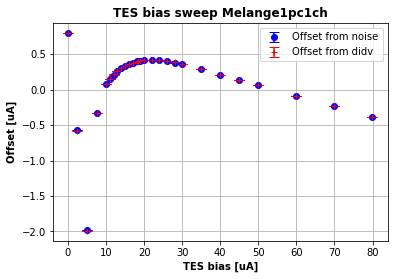

In [6]:
ivanalysis.describe()

# plot raw offset (no analysis)
ivanalysis.plot_ivsweep_offset(channel='Melange1pc1ch')

In [8]:
# If needed modify the number of SC and/or normal bias point
ivanalysis.set_nb_sc_normal_points('Melange1pc1ch', nnorm=6)
ivanalysis.describe()


Channel Melange1pc1ch:
 * Tag "default":
    ivsweep_data: pandas.DataFrame (28, 41)
       Nb SC points: 3
       Nb Normal points: 6


### Analyze sweep

INFO: Saving filter/TES data to file /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5
INFO: channel data with same tag may be overwritten
Storing /Melange1pc1ch/ivsweep_data_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5
Storing /Melange1pc1ch/ivsweep_results_noise_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5
Storing /Melange1pc1ch/ivsweep_results_didv_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5


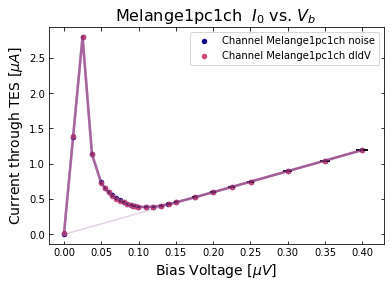

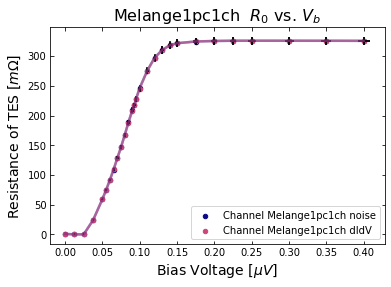

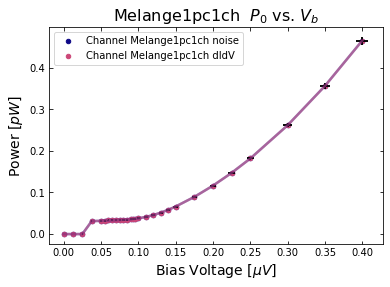

In [9]:
ivanalysis.analyze_sweep(lgc_plot=True, lgc_invert_offset='auto')

### Get IV sweep analysis results

In [10]:
result = ivanalysis.get_ivsweep_results('Melange1pc1ch')
result

{'rp': 0.003919024994864679,
 'rp_err': 7.838049989729357e-05,
 'rn': 0.3257535890569221,
 'rn_err': 0.006693911181930891,
 'rshunt': 0.004999999888241291,
 'rshunt_err': 9.999999776482583e-05,
 'i0_off': -8.103776886022854e-07,
 'i0_off_err': 2.374095508725114e-11,
 'ibias_off': 1.183086875381165e-08,
 'ibias_off_err': 4.5920332443522657e-11,
 'lgc_invert_offset': True,
 'close_loop_norm': 625000.0,
 'output_variable_offset': -0.07203907519578934,
 'output_variable_gain': 50.0,
 'group_name_sweep': 'iv_didv_I2_D20230615_T231959',
 'i0_variable_offset': -5.763126015663147e-06}

### Analyze didV data 


Melange1pc1ch SC dIdV analysis


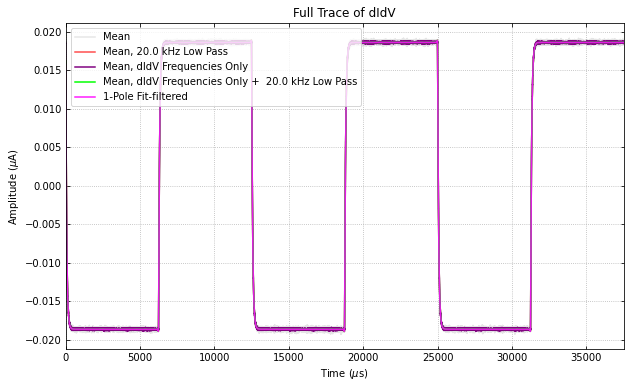

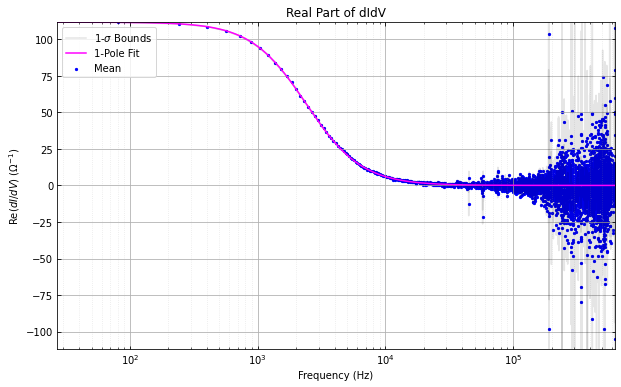

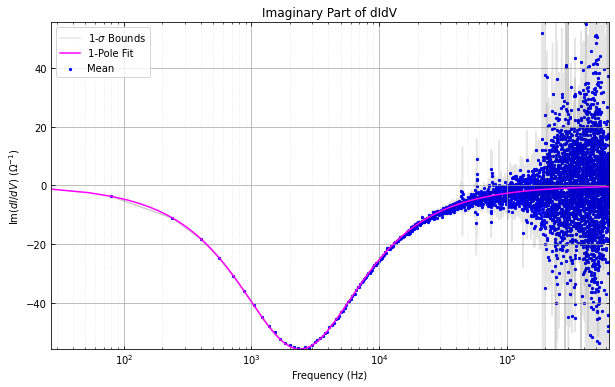

Melange1pc1ch Rp from dIdV fit = 3.96 +/- 0.008 mOhms
Melange1pc1ch Rp from IV Sweep = 3.92 +/- 0.078 mOhms
INFO: Saving filter/TES data to file /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5
INFO: channel data with same tag may be overwritten
Storing /Melange1pc1ch/ivsweep_data_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5
Storing /Melange1pc1ch/ivsweep_results_noise_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5
Storing /Melange1pc1ch/ivsweep_results_didv_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5

Melange1pc1ch Normal dIdV analysis


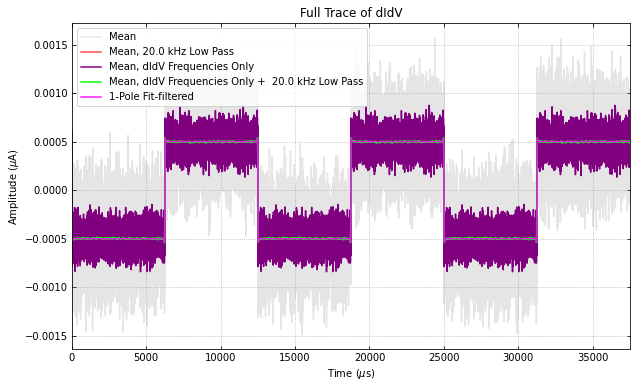

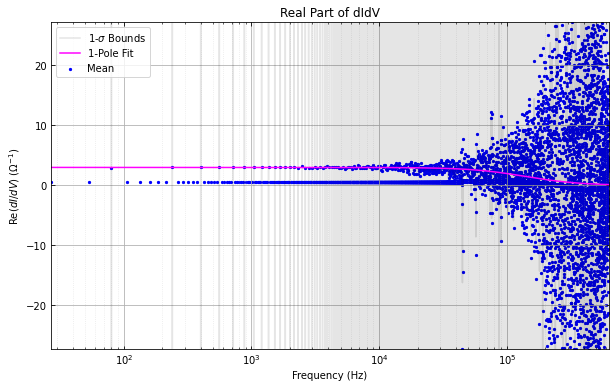

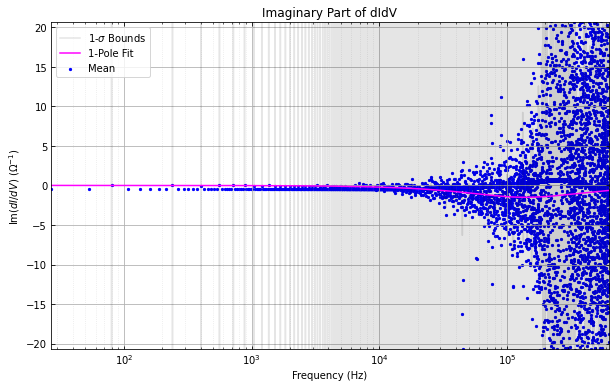

Melange1pc1ch Rn from dIdV fit = 323.63 +/- 1.100 mOhms
Melange1pc1ch Rn from IV Sweep = 325.75 +/- 6.694 mOhms
INFO: Saving filter/TES data to file /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5
INFO: channel data with same tag may be overwritten
Storing /Melange1pc1ch/ivsweep_data_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5
Storing /Melange1pc1ch/ivsweep_results_noise_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5
Storing /Melange1pc1ch/ivsweep_results_didv_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5

Melange1pc1ch Transition dIdV analysis


Melange1pc1ch TES bias 19.002 uA, R0 = 227.72 mOhms (% Rn = 69.90)

Fit chi2/Ndof = 0.171

Fit time constants, NOT dIdV Poles: 
Tau1: 1.51e+03 s
Tau2: 1.8e-06 s
Tau3: 0.0003325 s
 

True dIdV Poles: 
Tau_plus: 1.8e-06 s
Tau_minus: 0.000309 s
Tau_third: 0.0003325 s

Small Signal Parameters:
l (loop gain) = 1.000 +/- 0.

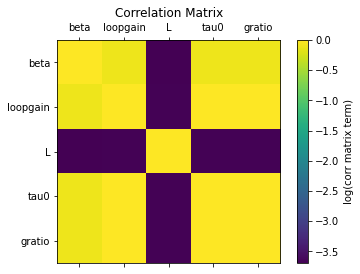

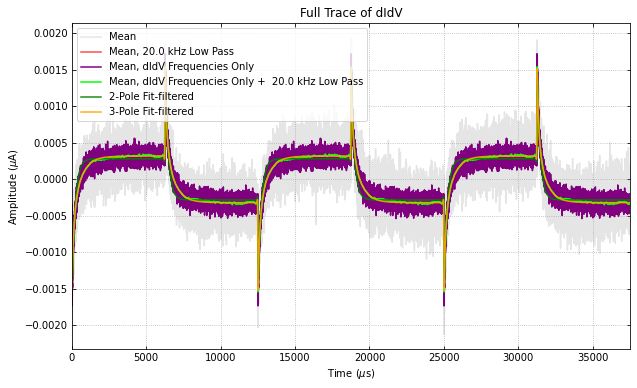

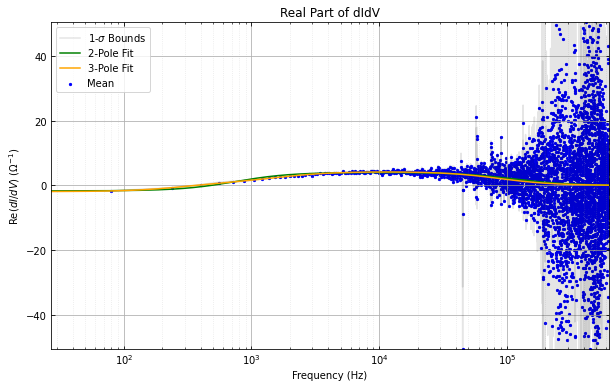

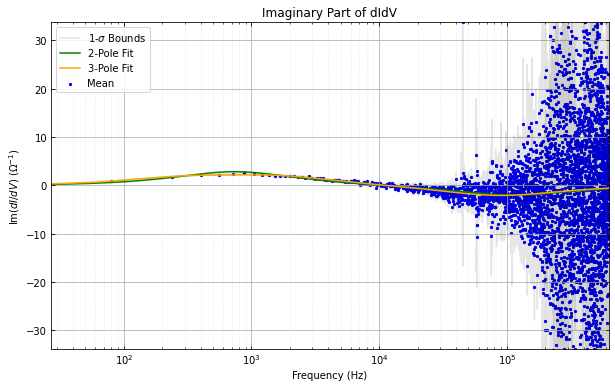



Melange1pc1ch TES bias 18.513 uA, R0 = 217.19 mOhms (% Rn = 66.70)

Fit chi2/Ndof = 0.162

Fit time constants, NOT dIdV Poles: 
Tau1: 0.00106 s
Tau2: 1.99e-06 s
Tau3: 0.0003468 s
 

True dIdV Poles: 
Tau_plus: 2.03e-06 s
Tau_minus: 9.79e-05 s
Tau_third: 0.0005437 s

Small Signal Parameters:
l (loop gain) = 1.219 +/- 0.0477
beta = 0.036 +/- 0.0217
gratio = 0.604 +/- 0.0165
tau0 = 0.232 +/- 0.01194 ms
L = 465.716 +/- 15.8463 nH


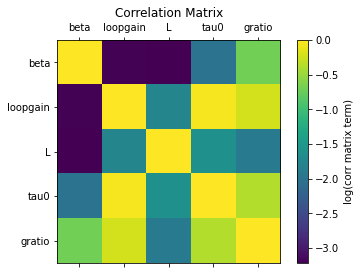

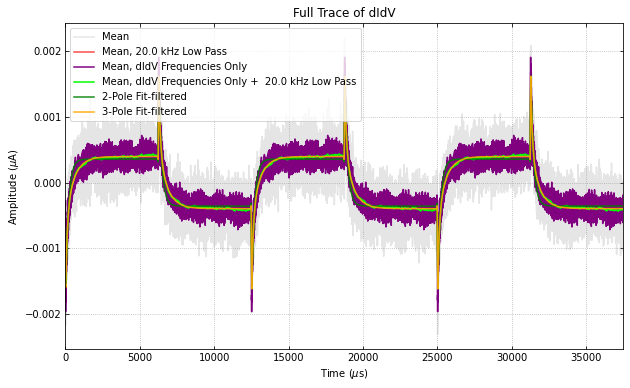

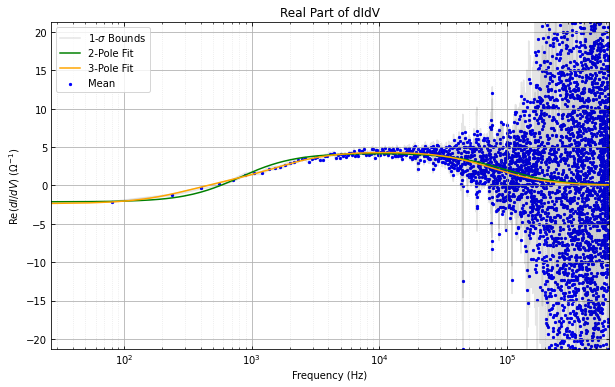

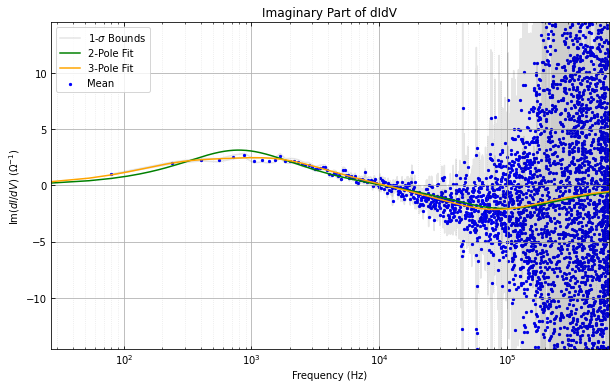



Melange1pc1ch TES bias 18.025 uA, R0 = 209.50 mOhms (% Rn = 64.30)

Fit chi2/Ndof = 0.165

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000734 s
Tau2: 2.22e-06 s
Tau3: 0.0003151 s
 

True dIdV Poles: 
Tau_plus: 2.28e-06 s
Tau_minus: 8.92e-05 s
Tau_third: 0.0004932 s

Small Signal Parameters:
l (loop gain) = 1.302 +/- 0.0521
beta = 0.020 +/- 0.0214
gratio = 0.626 +/- 0.0165
tau0 = 0.222 +/- 0.01153 ms
L = 493.785 +/- 15.1254 nH


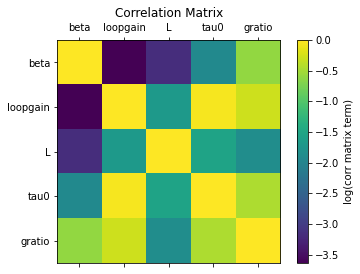

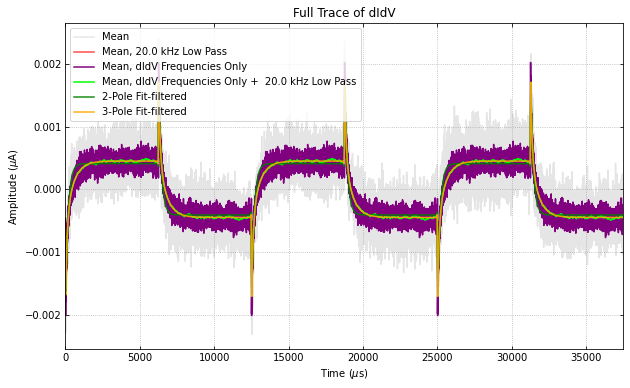

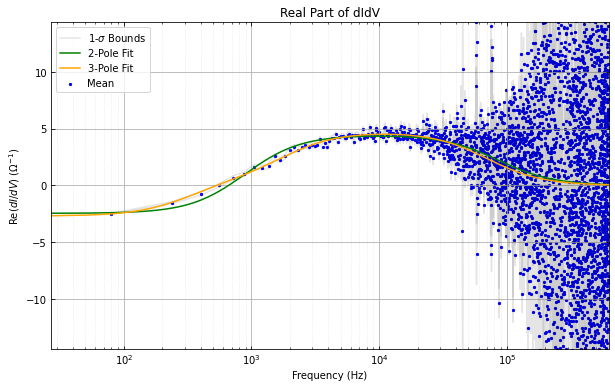

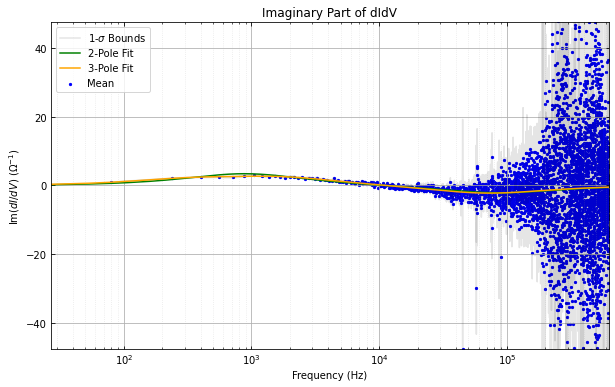



Melange1pc1ch TES bias 16.967 uA, R0 = 188.48 mOhms (% Rn = 57.90)

Fit chi2/Ndof = 0.166

Fit time constants, NOT dIdV Poles: 
Tau1: 0.00033 s
Tau2: 2.32e-06 s
Tau3: 0.0004094 s
 

True dIdV Poles: 
Tau_plus: 2.39e-06 s
Tau_minus: 0.000104 s
Tau_third: 0.0005694 s

Small Signal Parameters:
l (loop gain) = 1.929 +/- 0.0895
beta = 0.052 +/- 0.0223
gratio = 0.604 +/- 0.0208
tau0 = 0.306 +/- 0.01762 ms
L = 480.946 +/- 14.7999 nH


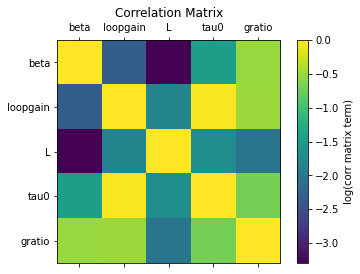

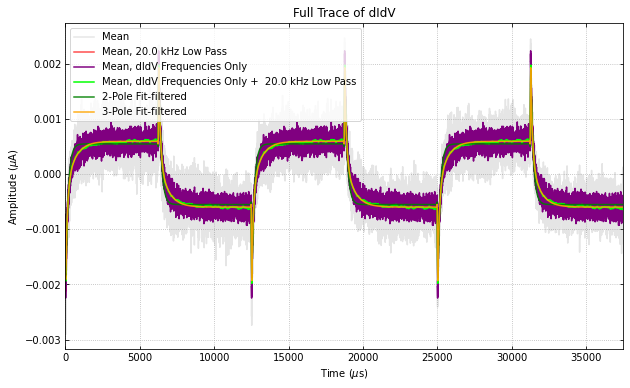

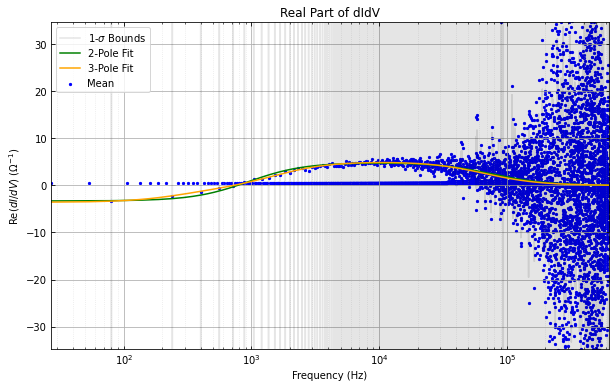

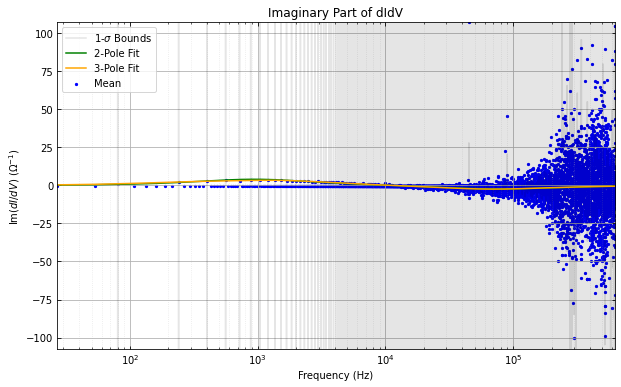



Melange1pc1ch TES bias 15.990 uA, R0 = 167.42 mOhms (% Rn = 51.40)

Fit chi2/Ndof = 0.164

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000315 s
Tau2: 2.69e-06 s
Tau3: 0.0002724 s
 

True dIdV Poles: 
Tau_plus: 2.79e-06 s
Tau_minus: 9.05e-05 s
Tau_third: 0.0004175 s

Small Signal Parameters:
l (loop gain) = 1.872 +/- 0.0912
beta = 0.061 +/- 0.0223
gratio = 0.680 +/- 0.0196
tau0 = 0.275 +/- 0.01639 ms
L = 501.687 +/- 11.2887 nH


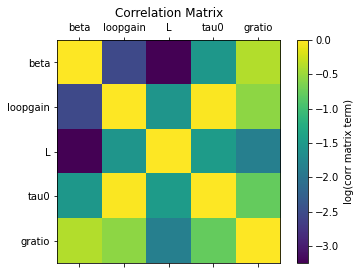

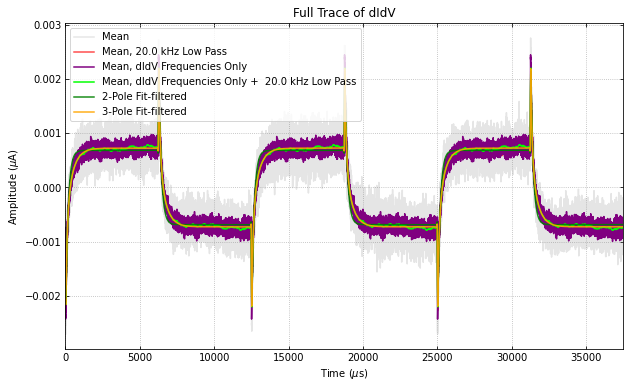

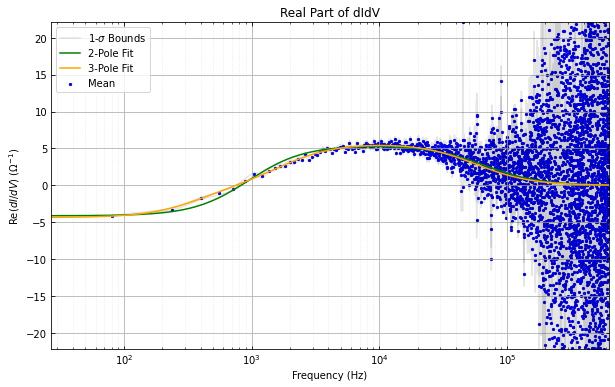

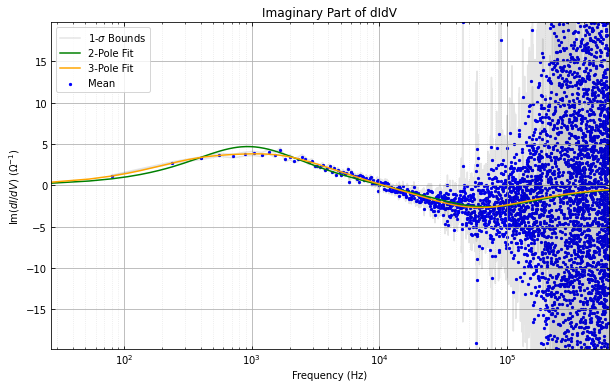



Melange1pc1ch TES bias 15.013 uA, R0 = 147.14 mOhms (% Rn = 45.20)

Fit chi2/Ndof = 0.168

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000281 s
Tau2: 2.98e-06 s
Tau3: 0.0002006 s
 

True dIdV Poles: 
Tau_plus: 3.12e-06 s
Tau_minus: 7.84e-05 s
Tau_third: 0.0003391 s

Small Signal Parameters:
l (loop gain) = 1.873 +/- 0.1203
beta = 0.101 +/- 0.0235
gratio = 0.744 +/- 0.0210
tau0 = 0.245 +/- 0.01892 ms
L = 509.893 +/- 11.7660 nH


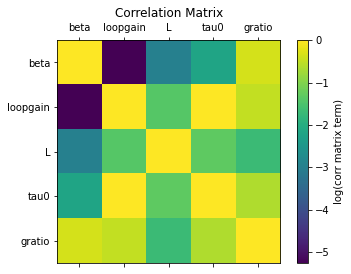

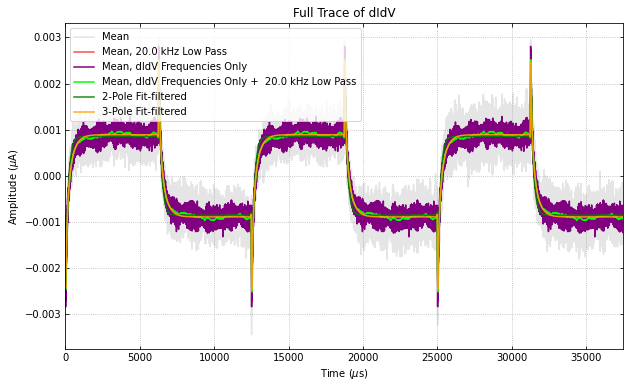

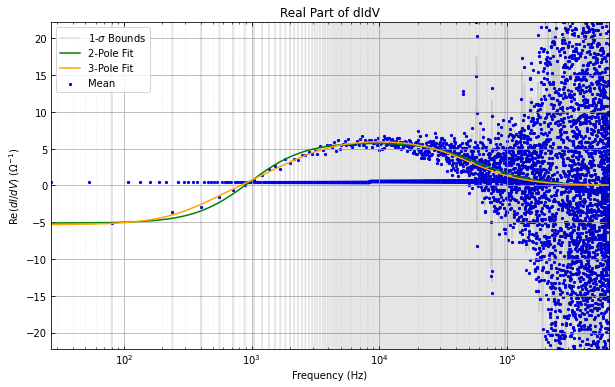

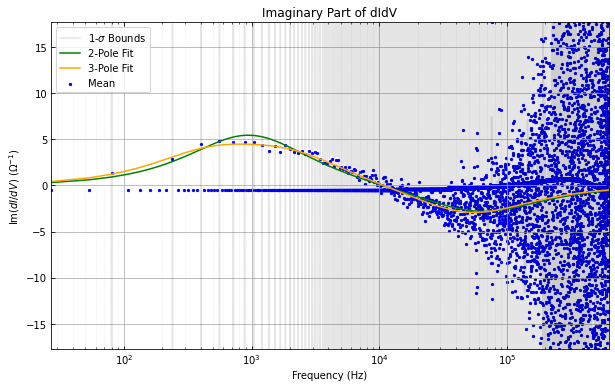



Melange1pc1ch TES bias 14.036 uA, R0 = 128.78 mOhms (% Rn = 39.50)

Fit chi2/Ndof = 0.165

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000242 s
Tau2: 3.36e-06 s
Tau3: 0.000191 s
 

True dIdV Poles: 
Tau_plus: 3.54e-06 s
Tau_minus: 7.81e-05 s
Tau_third: 0.0003229 s

Small Signal Parameters:
l (loop gain) = 2.073 +/- 0.1292
beta = 0.114 +/- 0.0237
gratio = 0.762 +/- 0.0211
tau0 = 0.26 +/- 0.01926 ms
L = 512.737 +/- 9.3617 nH


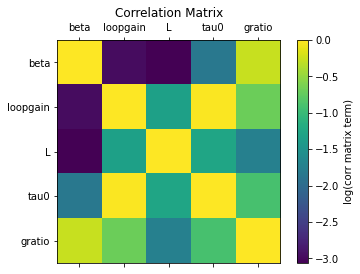

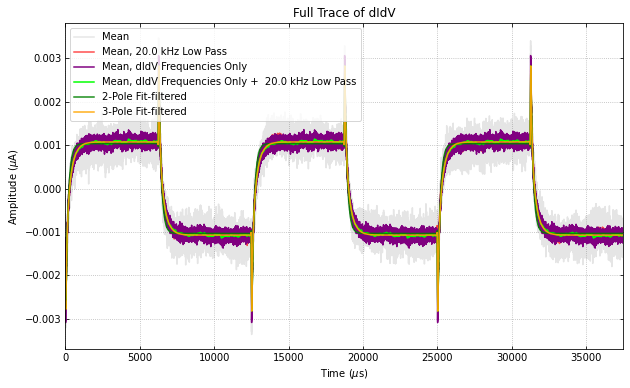

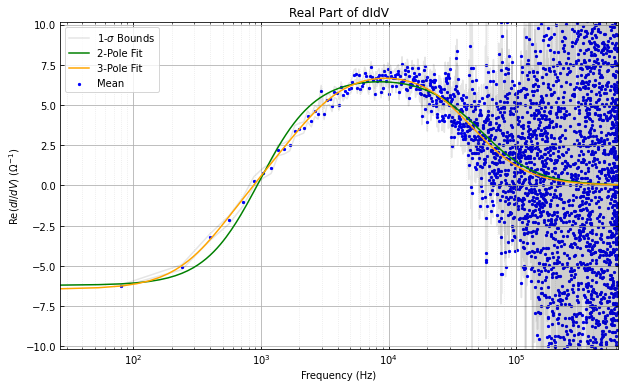

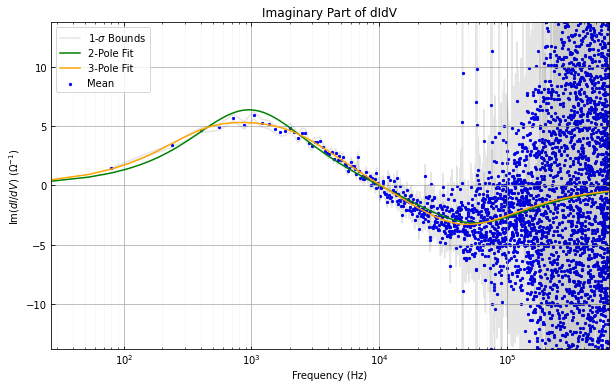



Melange1pc1ch TES bias 12.978 uA, R0 = 108.62 mOhms (% Rn = 33.30)

Fit chi2/Ndof = 0.164

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000183 s
Tau2: 4.19e-06 s
Tau3: 0.0002669 s
 

True dIdV Poles: 
Tau_plus: 4.49e-06 s
Tau_minus: 8.76e-05 s
Tau_third: 0.000399 s

Small Signal Parameters:
l (loop gain) = 2.755 +/- 0.1766
beta = 0.150 +/- 0.0249
gratio = 0.761 +/- 0.0252
tau0 = 0.321 +/- 0.02421 ms
L = 561.421 +/- 10.2254 nH


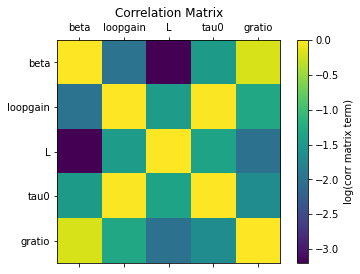

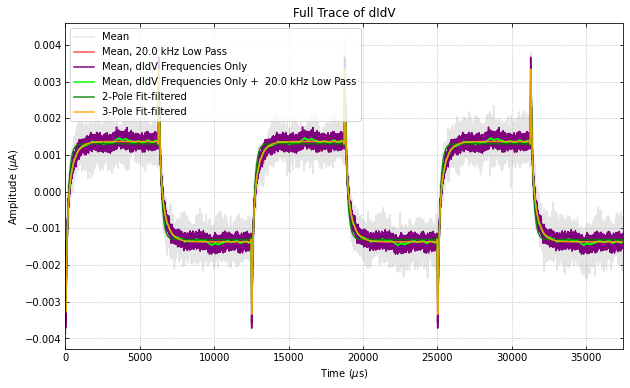

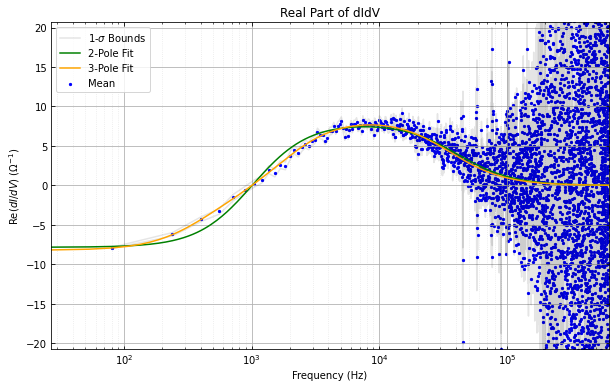

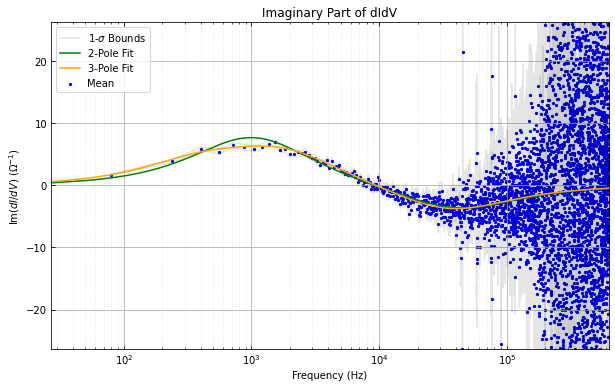



Melange1pc1ch TES bias 12.001 uA, R0 = 91.37 mOhms (% Rn = 28.00)

Fit chi2/Ndof = 0.162

Fit time constants, NOT dIdV Poles: 
Tau1: 0.00017 s
Tau2: 4.4e-06 s
Tau3: 0.0002015 s
 

True dIdV Poles: 
Tau_plus: 4.75e-06 s
Tau_minus: 7.74e-05 s
Tau_third: 0.0003349 s

Small Signal Parameters:
l (loop gain) = 2.639 +/- 0.1712
beta = 0.210 +/- 0.0262
gratio = 0.816 +/- 0.0235
tau0 = 0.279 +/- 0.02126 ms
L = 525.256 +/- 8.0588 nH


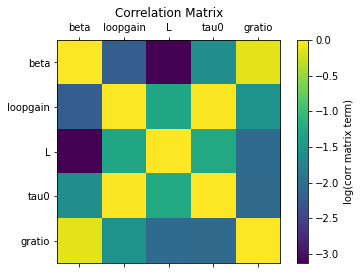

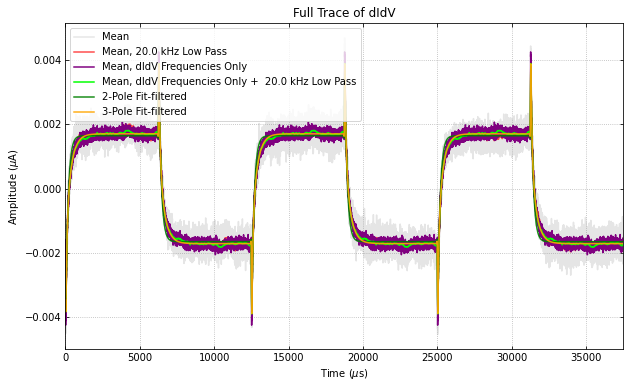

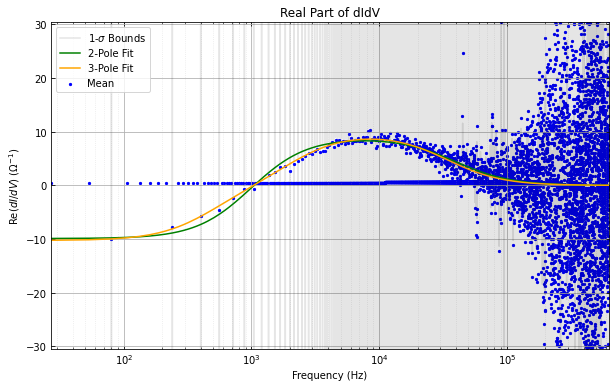

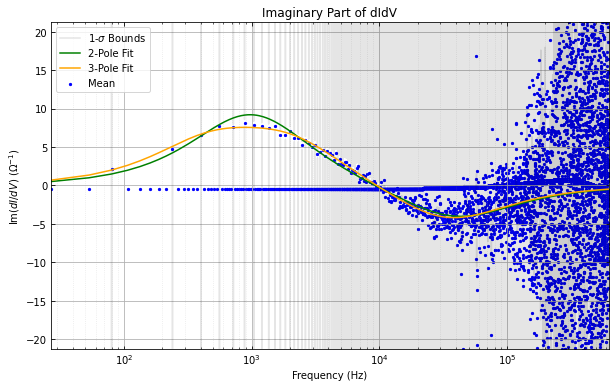



Melange1pc1ch TES bias 11.025 uA, R0 = 75.02 mOhms (% Rn = 23.00)

Fit chi2/Ndof = 0.168

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000135 s
Tau2: 5.07e-06 s
Tau3: 0.0001999 s
 

True dIdV Poles: 
Tau_plus: 5.6e-06 s
Tau_minus: 7.76e-05 s
Tau_third: 0.0003177 s

Small Signal Parameters:
l (loop gain) = 3.242 +/- 0.2103
beta = 0.288 +/- 0.0281
gratio = 0.800 +/- 0.0269
tau0 = 0.303 +/- 0.02289 ms
L = 535.569 +/- 6.9604 nH


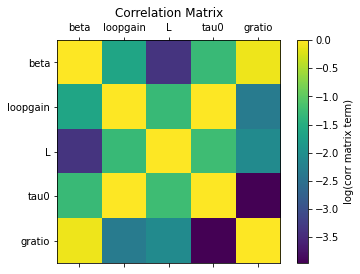

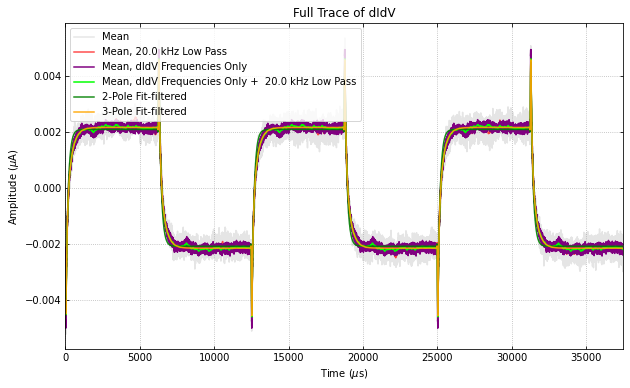

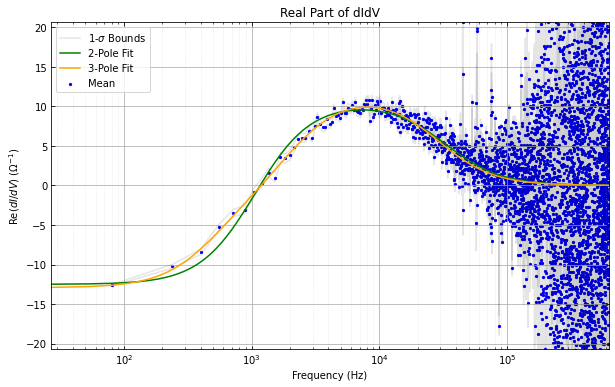

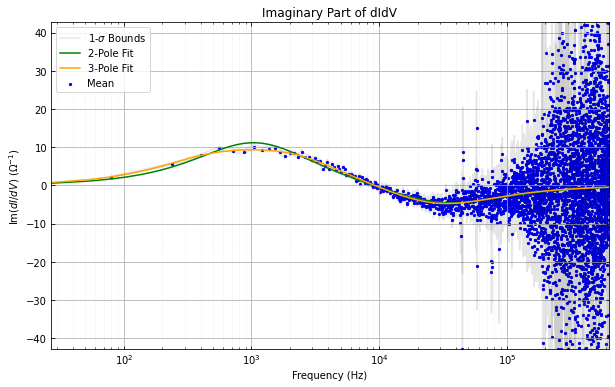



Melange1pc1ch TES bias 9.966 uA, R0 = 58.75 mOhms (% Rn = 18.00)

Fit chi2/Ndof = 0.165

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000113 s
Tau2: 6.3e-06 s
Tau3: 0.0002444 s
 

True dIdV Poles: 
Tau_plus: 7.19e-06 s
Tau_minus: 8.26e-05 s
Tau_third: 0.0003658 s

Small Signal Parameters:
l (loop gain) = 4.123 +/- 0.2543
beta = 0.362 +/- 0.0301
gratio = 0.816 +/- 0.0323
tau0 = 0.352 +/- 0.02514 ms
L = 560.507 +/- 6.0907 nH


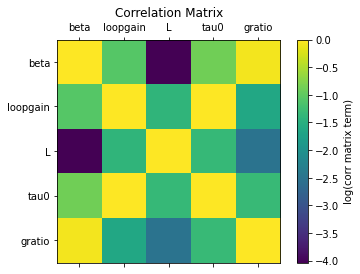

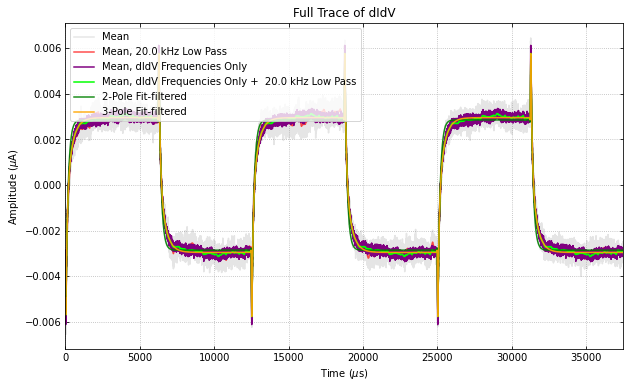

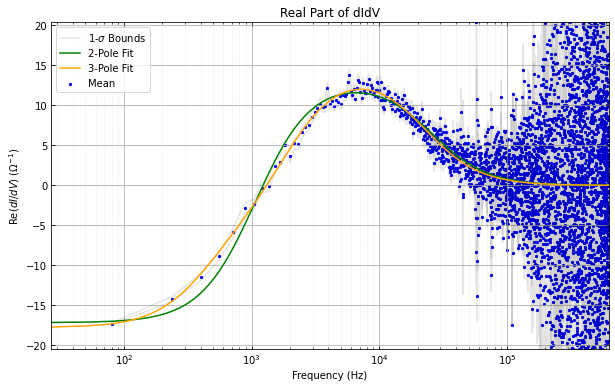

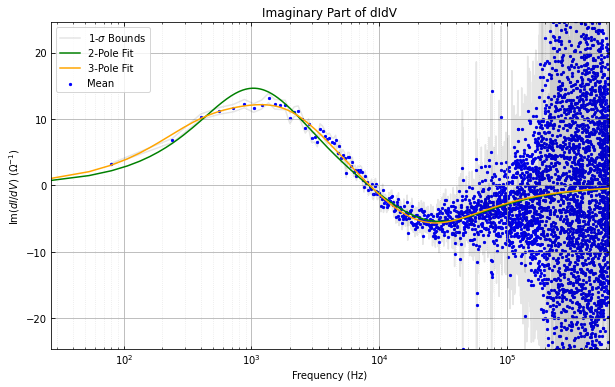



Melange1pc1ch TES bias 7.524 uA, R0 = 24.09 mOhms (% Rn = 7.40)

Fit chi2/Ndof = 0.167

Fit time constants, NOT dIdV Poles: 
Tau1: 6.4e-05 s
Tau2: 1.08e-05 s
Tau3: 0.000228 s
 

True dIdV Poles: 
Tau_plus: 1.49e-05 s
Tau_minus: 8.94e-05 s
Tau_third: 0.0003377 s

Small Signal Parameters:
l (loop gain) = 9.096 +/- 0.8607
beta = 0.791 +/- 0.0440
gratio = 0.814 +/- 0.0635
tau0 = 0.518 +/- 0.0537 ms
L = 562.801 +/- 4.4602 nH


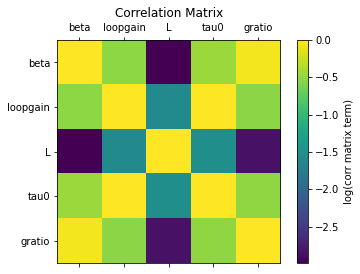

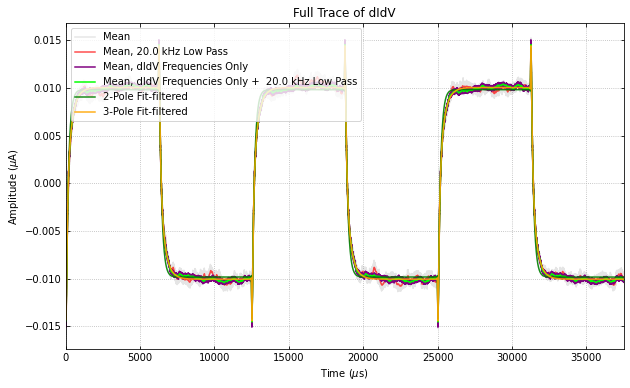

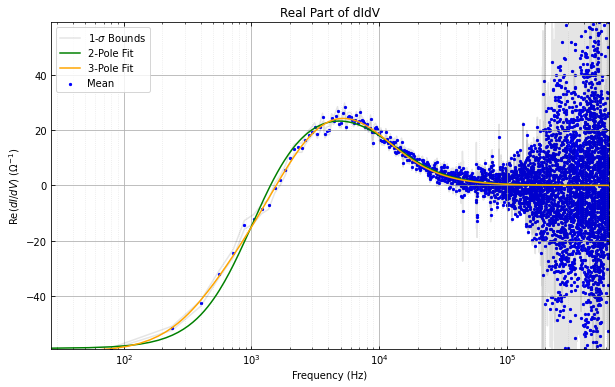

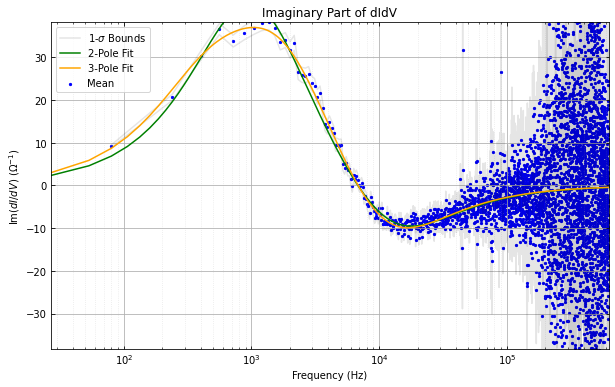

INFO: Saving filter/TES data to file /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5
INFO: channel data with same tag may be overwritten
Storing /Melange1pc1ch/ivsweep_data_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5
Storing /Melange1pc1ch/ivsweep_results_noise_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5
Storing /Melange1pc1ch/ivsweep_results_didv_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5


In [11]:
ivanalysis.analyze_didv(lgc_plot=True)

#### dIdV analysis summary

Summary dIdV Analysis for Melange1pc1ch

TES Superconducting Measurements:

Rp from dIdV fit = 3.96 +/- 0.008 mOhms
Rp rom IV Sweep = 325.75 +/- 6.694 mOhms

TES Normal Measurements:

Rn from dIdV fit = 323.63 +/- 1.100 mOhms
Rn rom IV Sweep = 325.75 +/- 6.694 mOhms

TES in Transition Measurements:


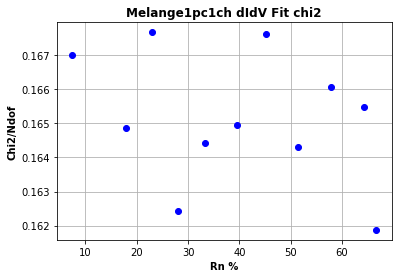


Small Signal Parameters


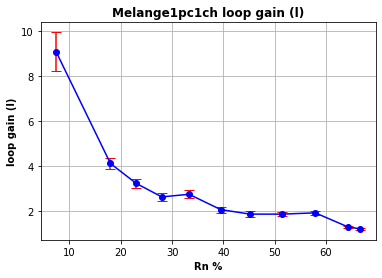

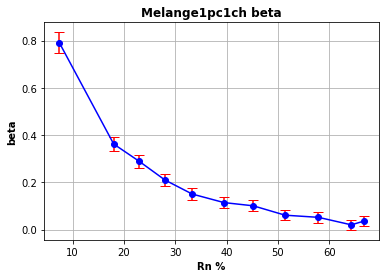

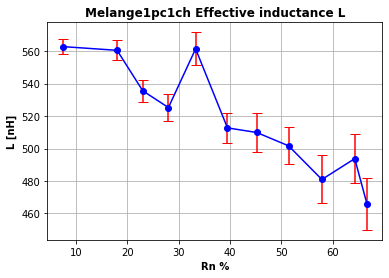

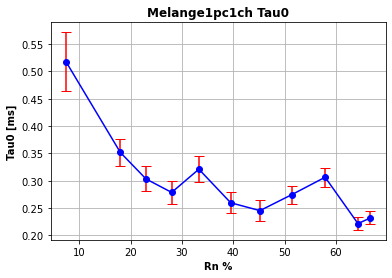

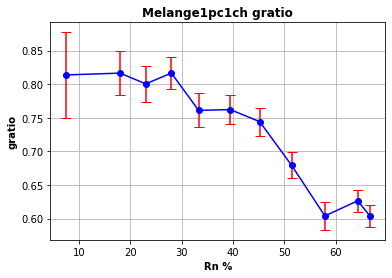


Fall Times


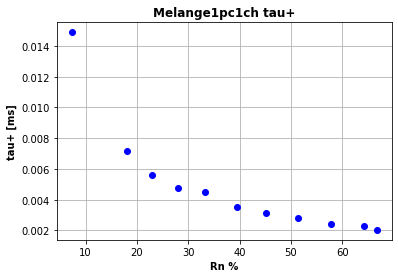

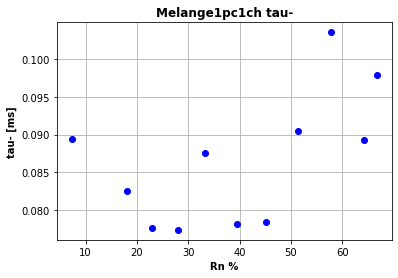

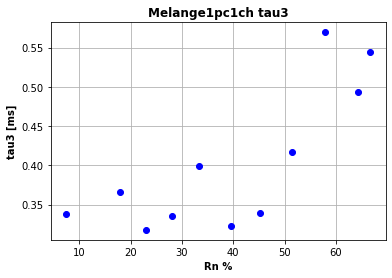

In [12]:
ivanalysis.plot_didv_summary('Melange1pc1ch')

###  Energy Resolution

Energy resolution is calculated using a dirac delta power input. An external template can be added (either power template or current template)

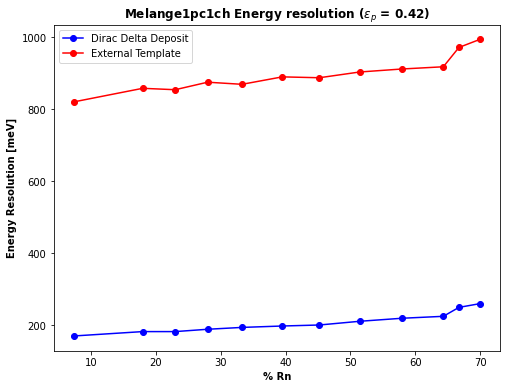

INFO: Saving filter/TES data to file /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5
INFO: channel data with same tag may be overwritten
Storing /Melange1pc1ch/ivsweep_data_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5
Storing /Melange1pc1ch/ivsweep_results_noise_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5
Storing /Melange1pc1ch/ivsweep_results_didv_default in /sdata1/runs/run28/filterdata/ivsweep_analysis_D20240130_T195408.hdf5


In [13]:
# let's define a template based on the pulse data (sum of  3 two-pole pulses),
# see Roger Romani's detanalysis phonon calibration demo

# dataframe
ivdata = ivanalysis.get_ivsweep_data('Melange1pc1ch')

# functional form parameters for template (power template)
amplitudes = [1.67e-15, 1.32e-15, 2.39e-17]
fall_times = [44.6e-6, 147.5e-6, 3872.9e-6]
rise_times = [8.79e-6, 8.79e-6, 8.79e-6]

# time array
nb_bins = ivdata['psd'][0].shape[0]
fs = ivdata['fs_noise'][0]
time_array = np.asarray(range(nb_bins))/fs

# define template
template =  qp.utils.make_template_sum_twopoles(time_array, amplitudes, 
                                                rise_times, fall_times, normalize=True)

ivanalysis.calc_energy_resolution(channels='Melange1pc1ch', lgc_plot=True, template=template,
                                  collection_eff=0.42, lgc_power_template=True)